In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import cv2
import torch
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw

### Specify the model checkpoint and image file

In [2]:
MODEL_PATH = '../ckpts/swin_base_char_aux_1m680k.pth'
IMAGE_PATH = '../assets/example.png'
MORE_IMAGES = ['../assets/example.png', '../assets/example1.png', '../assets/example2.png']

### Load the model and run inference

In [3]:
from molscribe import MolScribe

device = torch.device('cpu')
model = MolScribe(MODEL_PATH, device)
prediction = model.predict_image_file(IMAGE_PATH, return_atoms_bonds=True)
smiles = prediction['smiles']
molfile = prediction['molfile']

/data/rsg/nlp/yujieq/anaconda3/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/data/rsg/nlp/yujieq/anaconda3/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


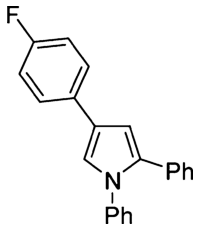


Predicted SMILES:
Fc1ccc(-c2cc(-c3ccccc3)n(-c3ccccc3)c2)cc1

Predicted MolFile:

     RDKit          2D

 14 15  0  0  0  0  0  0  0  0999 V2000
    4.8691   -8.5238    0.0000 R   0  0  0  0  0  0  0  0  0  0  0  0
    4.8691   -6.9365    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.5166   -5.9841    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0576   -4.5556    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1108   -3.2857    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4878   -3.4444    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6763   -2.1746    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2173   -0.7460    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2705    0.5238    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    2.8403   -0.5873    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7871   -1.8571    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5454   -4.5556    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0864   -

In [4]:
image = cv2.imread(IMAGE_PATH)
plt.imshow(image)
plt.axis('off')
plt.show()

print('\nPredicted SMILES:')
print(smiles)

print('\nPredicted MolFile:')
print(molfile)

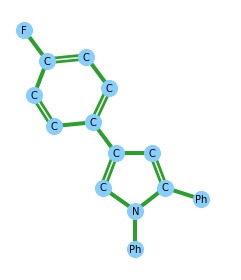

In [5]:
model.draw_prediction(prediction, image, notebook=True)

### Predicted SMILES

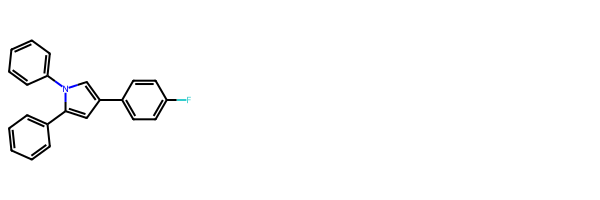

In [6]:
mol = Chem.MolFromSmiles(smiles)
svg = Draw.MolsToGridImage([mol])
display(svg)

### Predicted MolBlock
RDKit does not display superatoms. To view the full prediction, copy-paste the molblock
to ChemDraw (note the beginning blank line must be included).

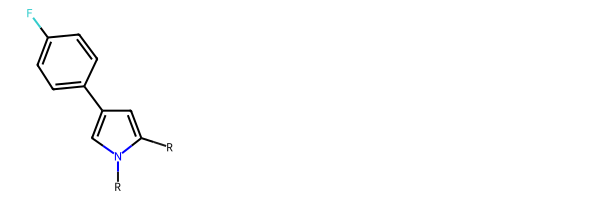

In [7]:
mol = Chem.MolFromMolBlock(molfile)
svg = Draw.MolsToGridImage([mol])
display(svg)

### Run inference with multiple images

In [ ]:
predictions = model.predict_image_files(MORE_IMAGES)